In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('shopping_trends.csv')
print('data loaded')

data loaded


**This dataset is ideal for data scientists, analysts, and marketers seeking to:**

=> Analyze consumer purchasing patterns over time.

=> Identify popular product categories and high-performing segments.

=> Develop customer segmentation and personalization strategies.

=> Build predictive models for sales forecasting or customer retention.

In [4]:
data.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [8]:
# Every 3 Months: Customers make a purchase every 3 months, which is equivalent to quarterly purchases.
# Annually: Customers make a purchase once a year.
# Quarterly: Customers make a purchase every 3 months.
# Monthly: Customers make a purchase every month.
# Bi-Weekly: Customers make a purchase every 2 weeks, which is equivalent to twice a month.
# Fortnightly: Customers make a purchase every 2 weeks, which is equivalent to twice a month.
# Weekly: Customers make a purchase every week.

data['Frequency of Purchases'].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [9]:
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

* There are no null values in the dataset!

# EDA

##  Customer Demographics

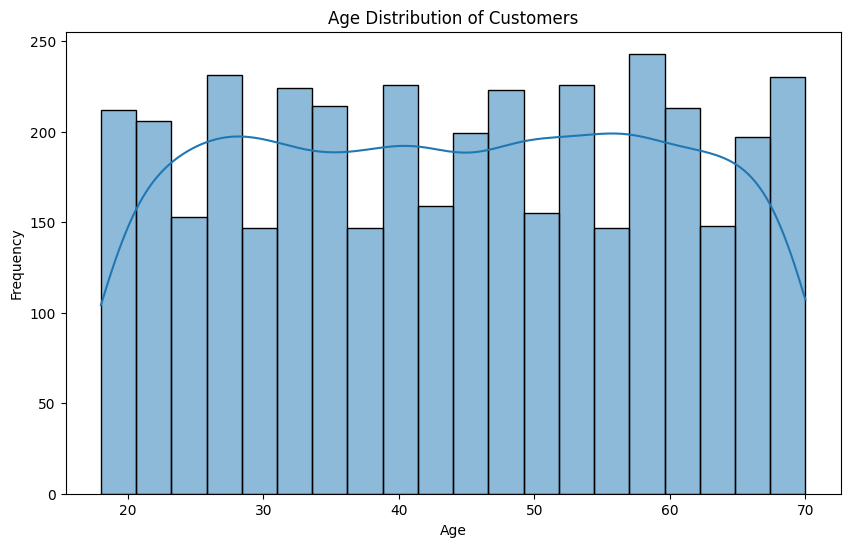

In [10]:
# Age Distribution:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

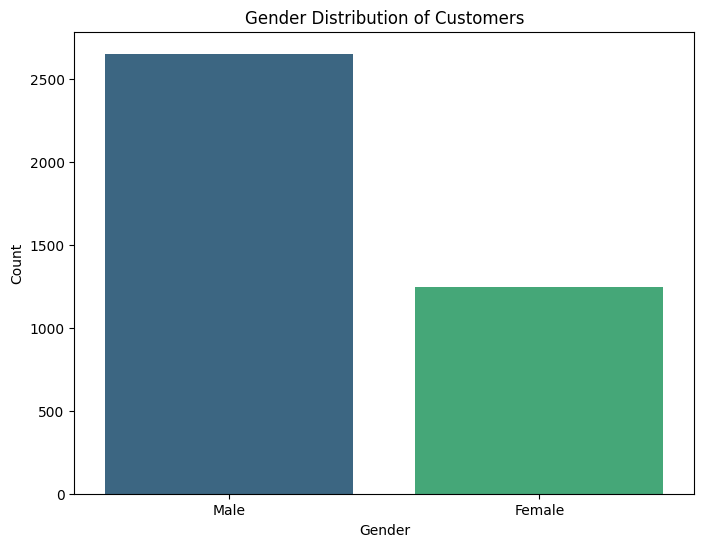

In [11]:
# Gender Distribution:
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##  Purchase Behavior

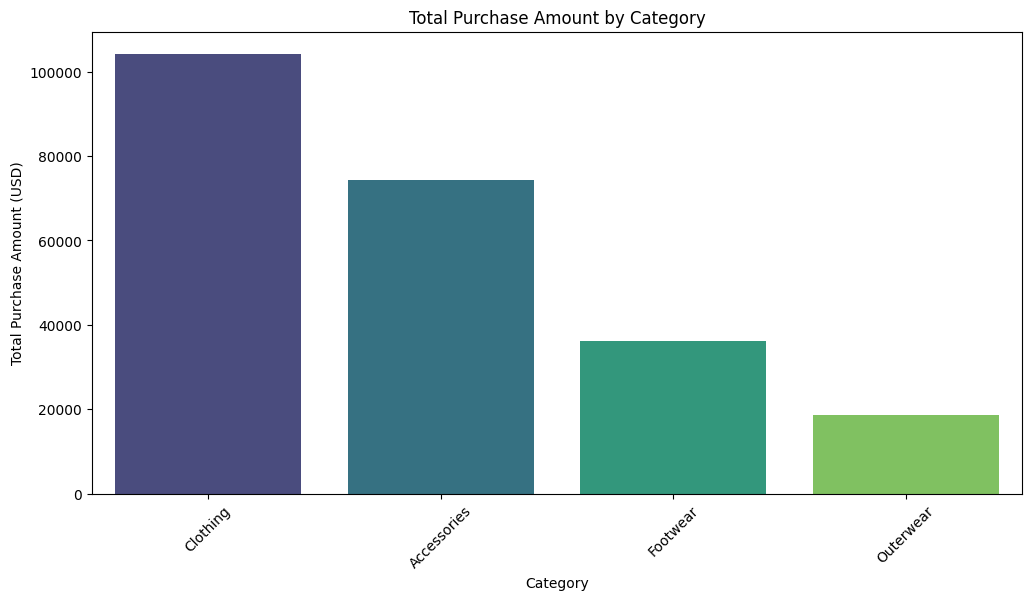

In [12]:
# Total Purchase Amount by Category:
category_sales = data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64


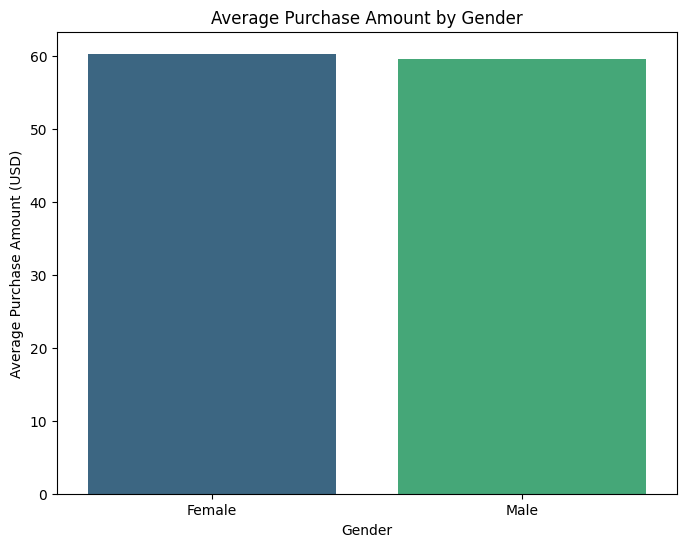

In [13]:
# Average Purchase Amount by Gender:
avg_purchase_by_gender = data.groupby('Gender')['Purchase Amount (USD)'].mean()
print(avg_purchase_by_gender)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_purchase_by_gender.index, y=avg_purchase_by_gender.values, palette='viridis')
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

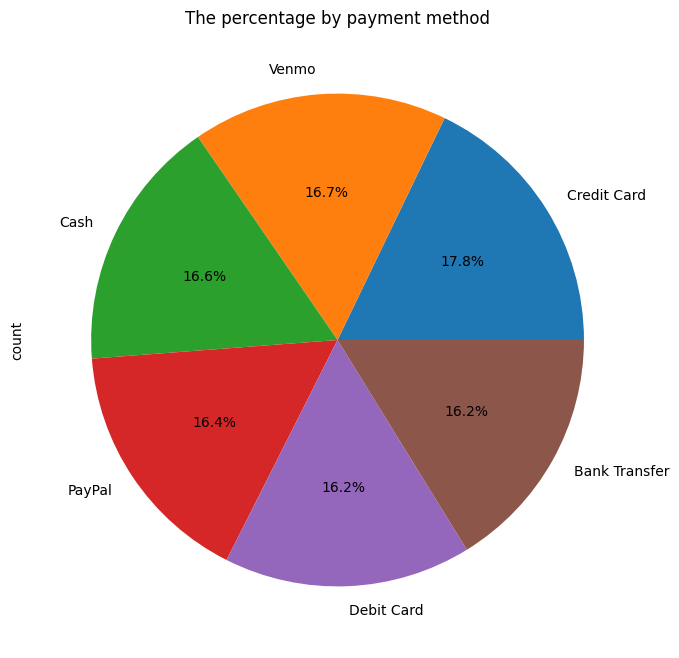

In [14]:
# percentage by payment method
plt.figure(figsize=(8,8)) 
data['Payment Method'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('The percentage by payment method')
plt.show()

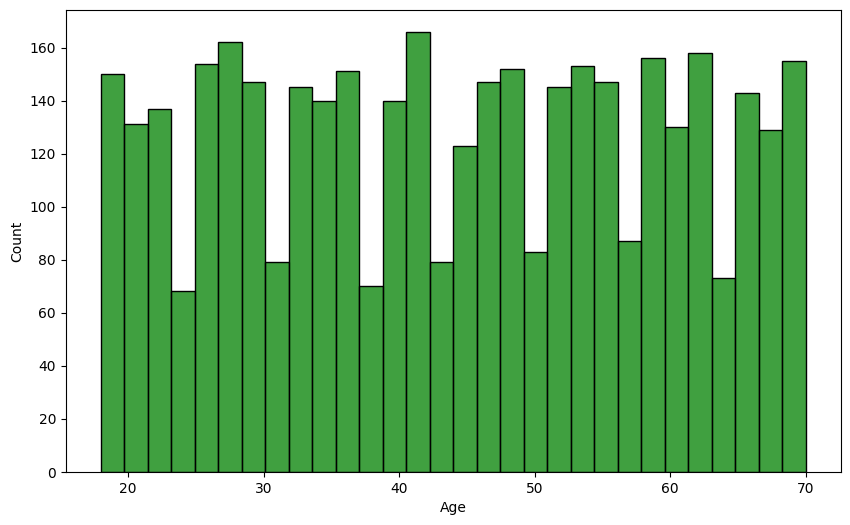

In [15]:
plt.figure(figsize=(10,6)) 
sns.histplot(x=data['Age'],bins=30,color='g')
plt.show()

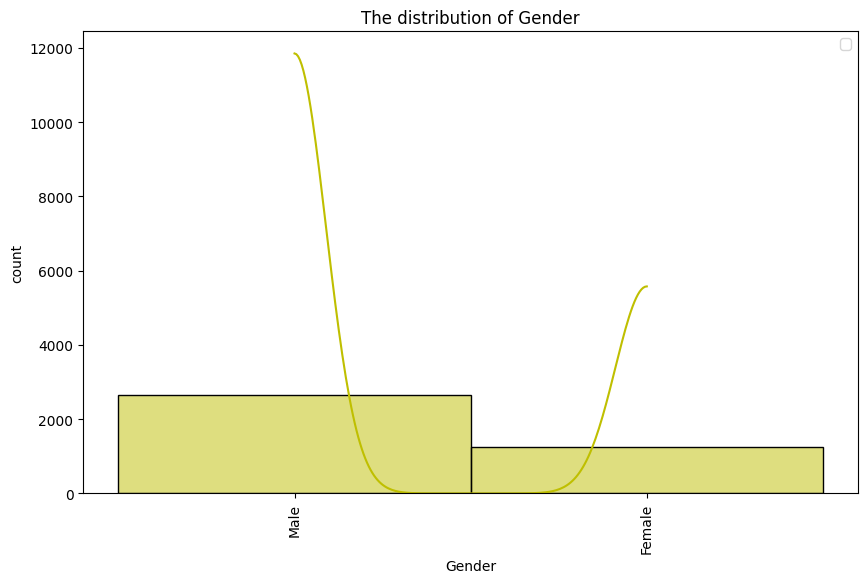

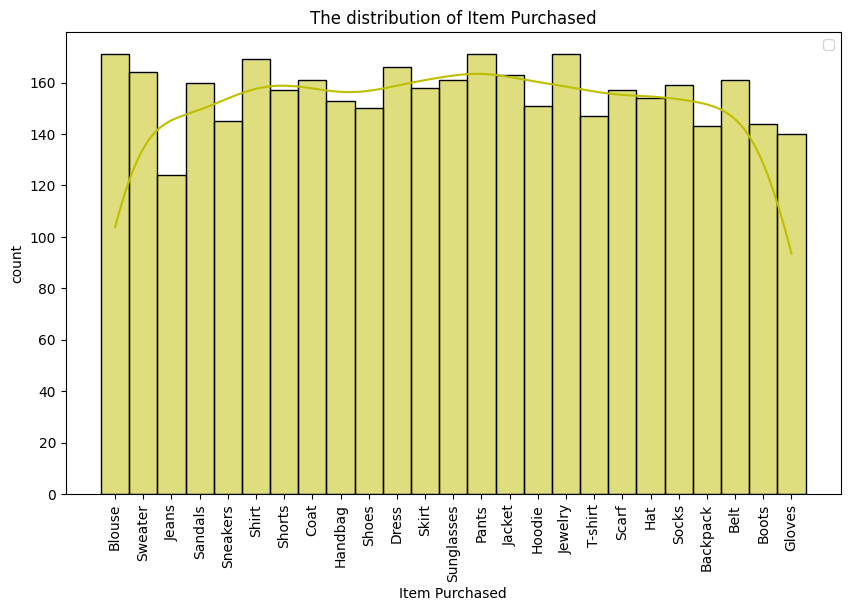

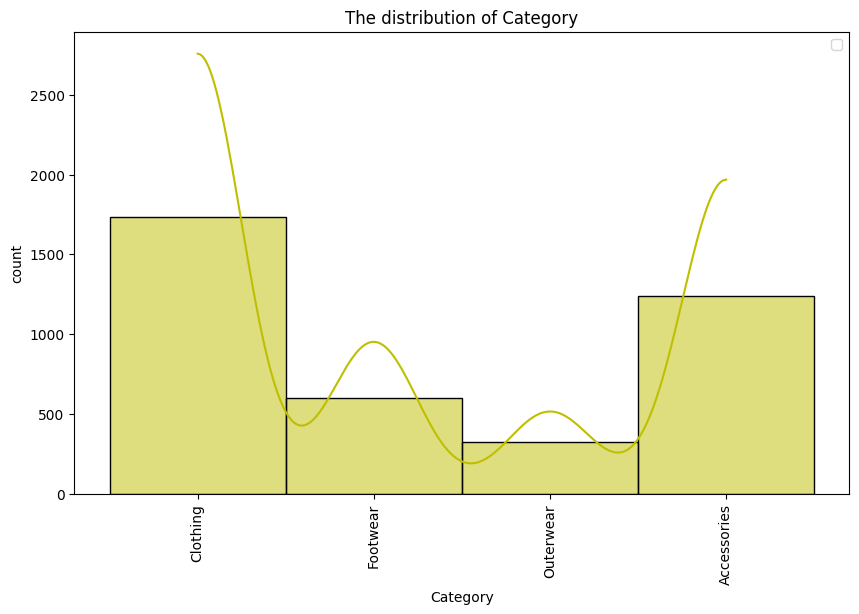

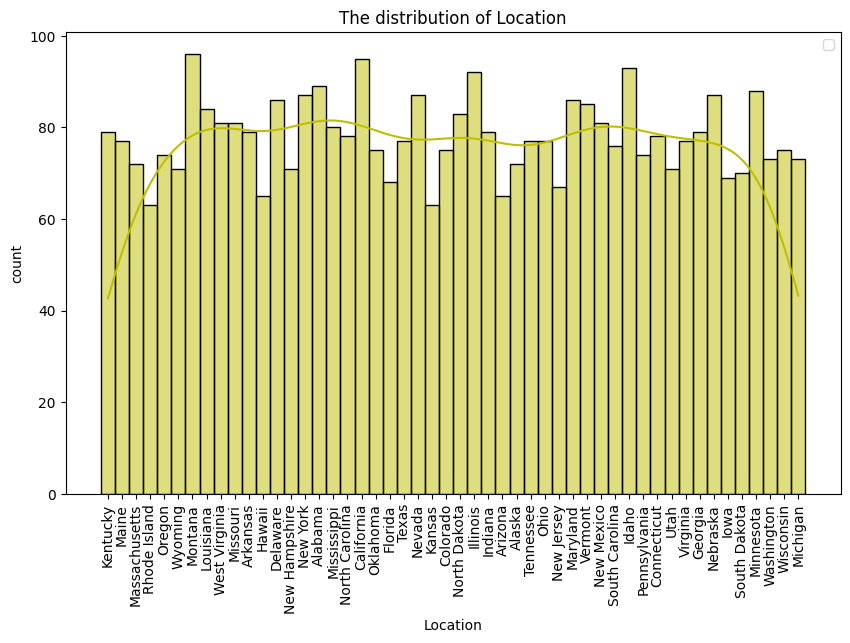

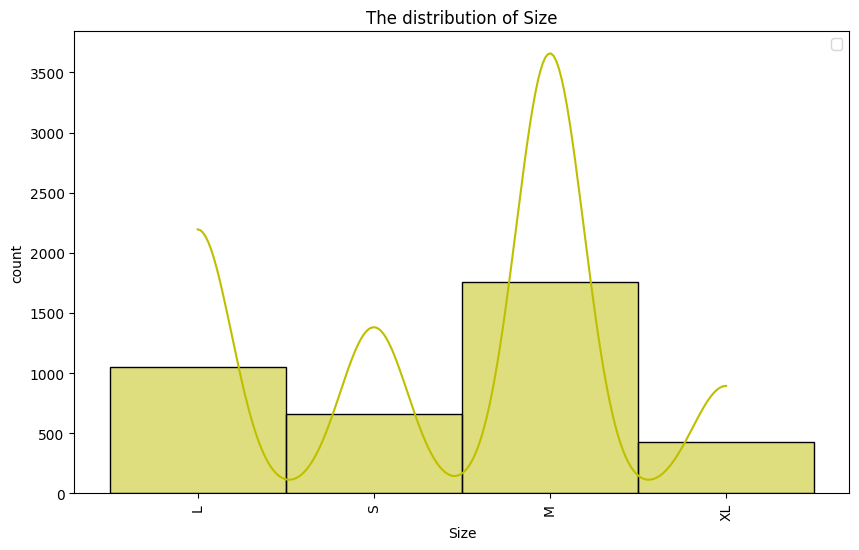

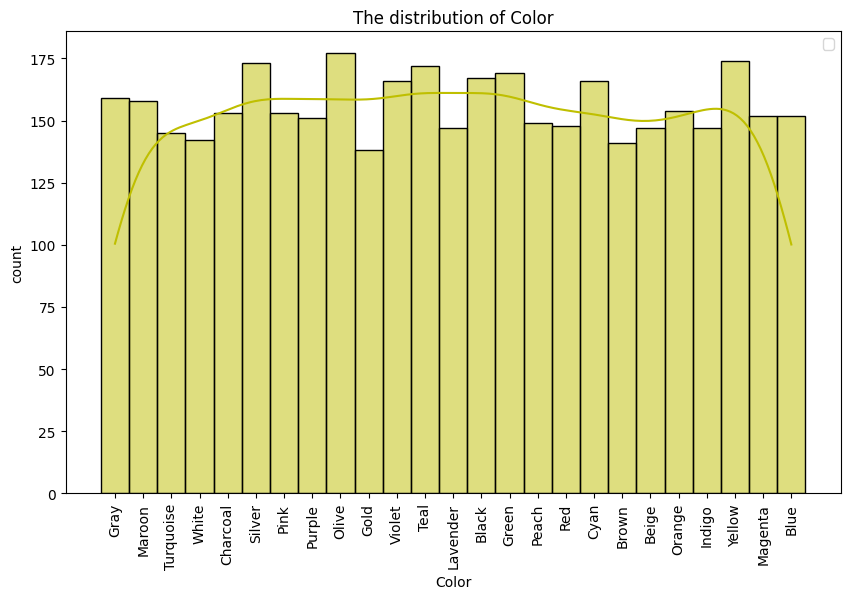

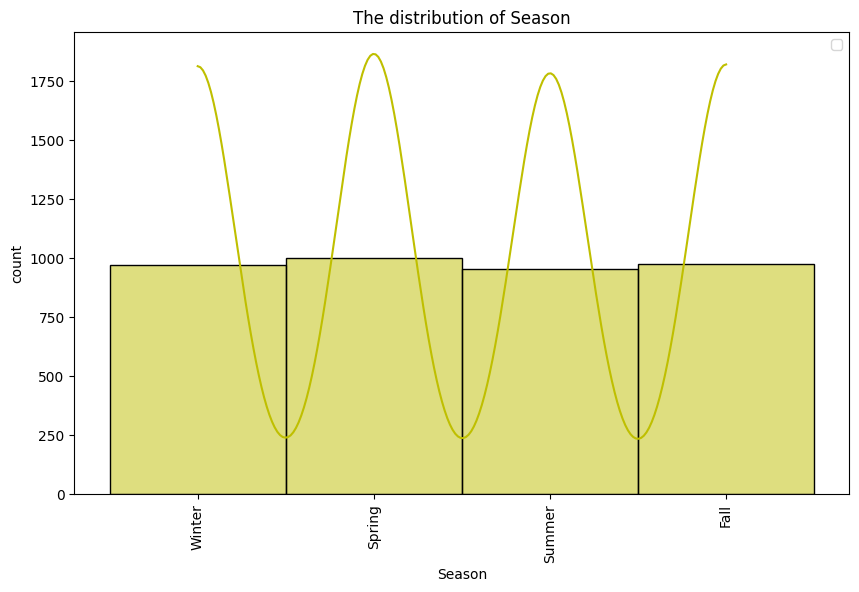

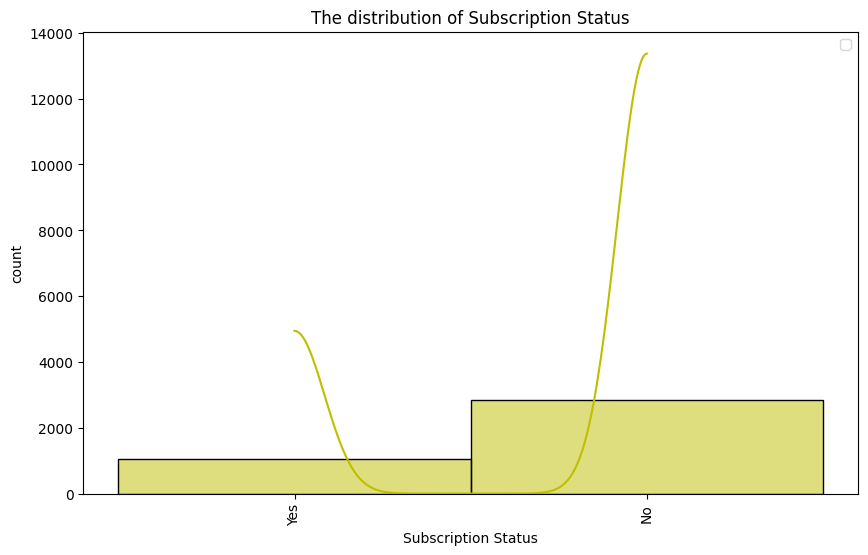

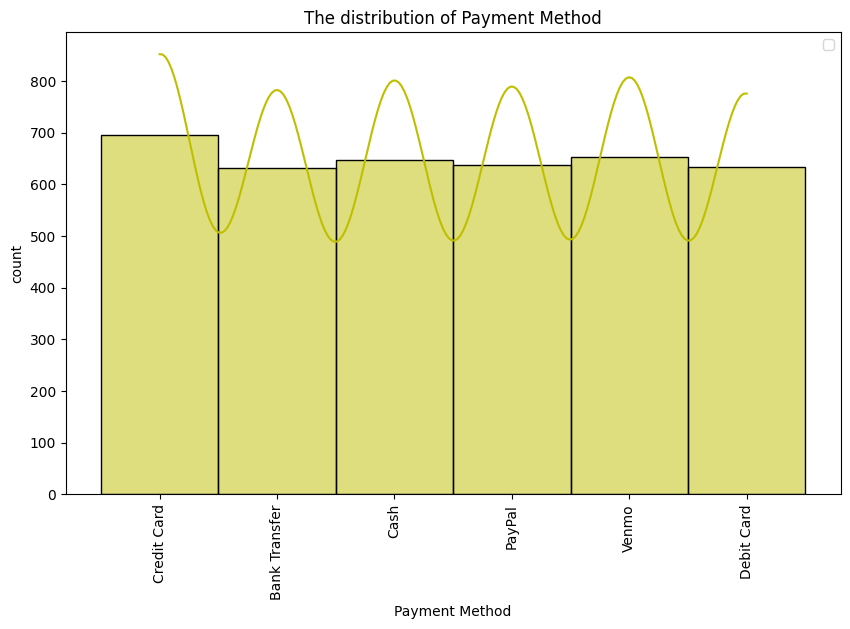

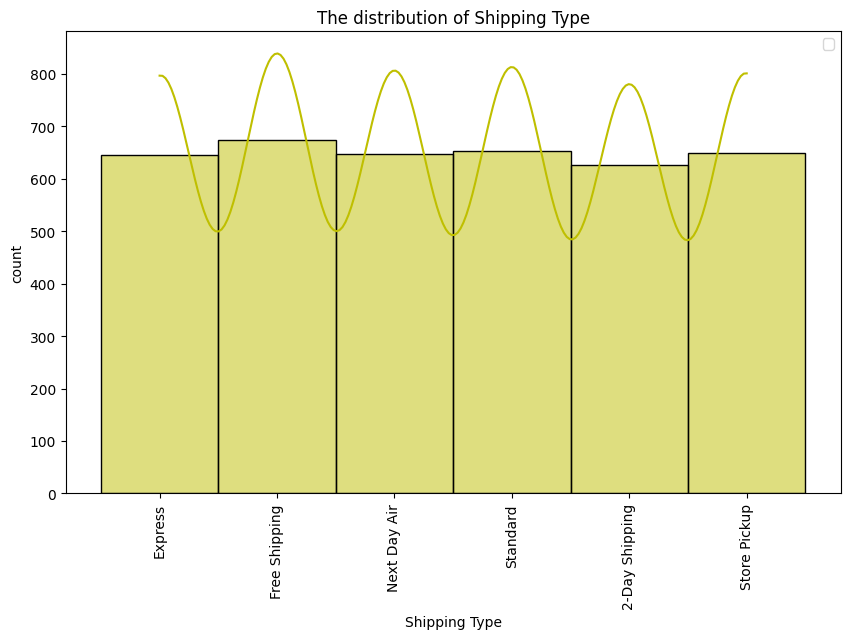

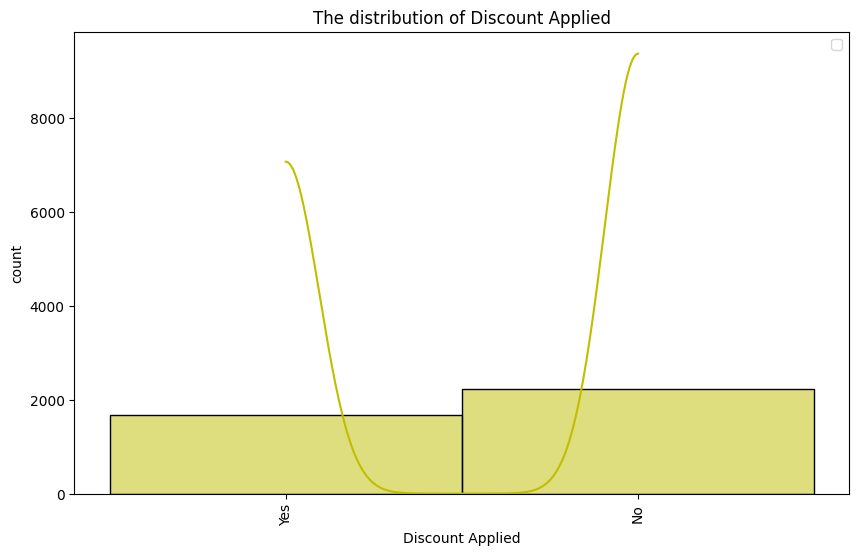

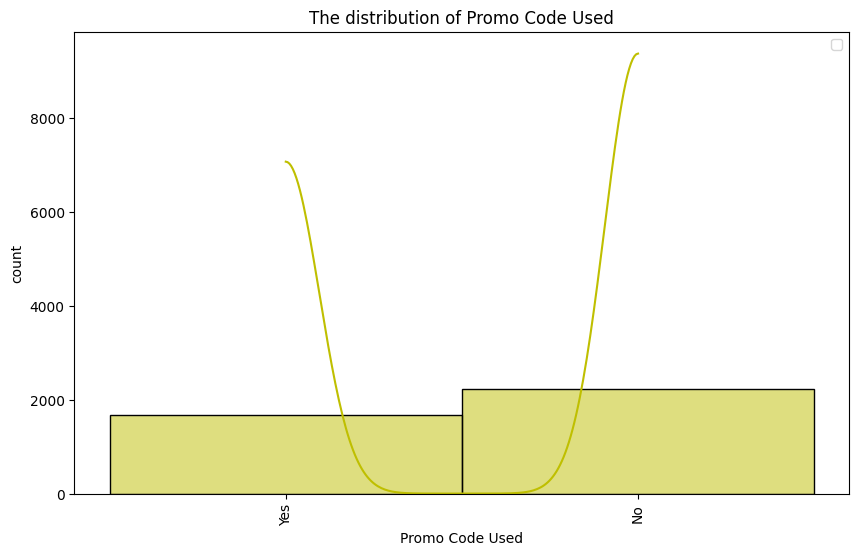

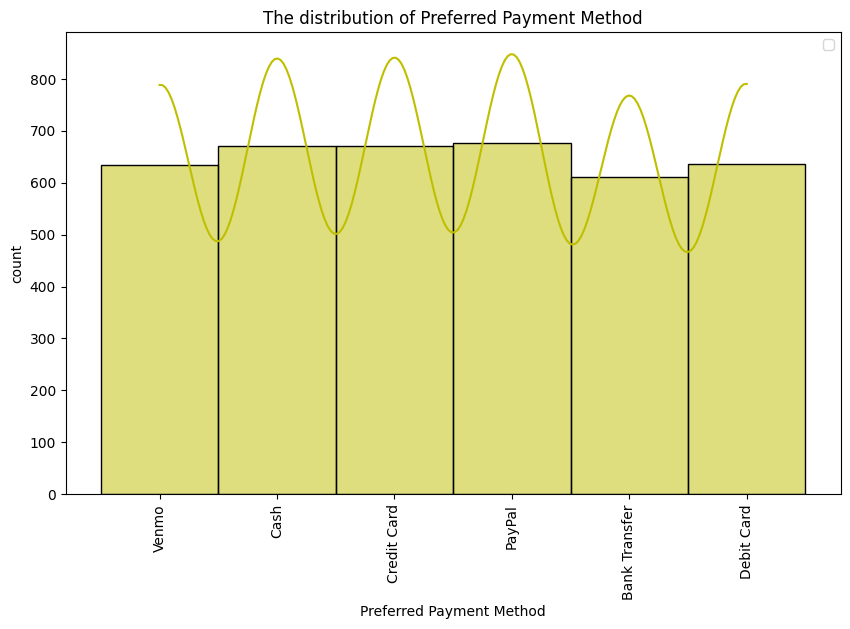

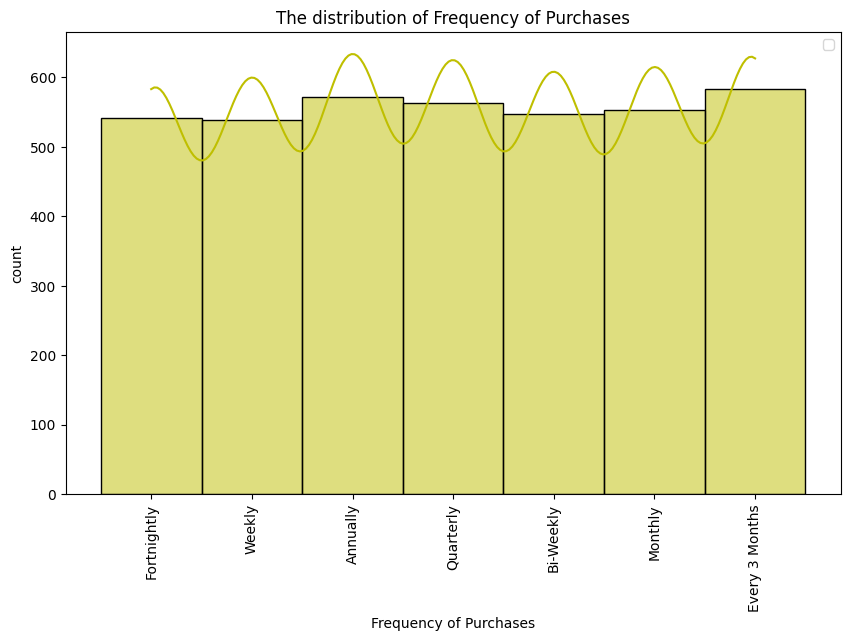

In [38]:
categorical_col = data.select_dtypes(include='object').columns 

for col in categorical_col:
    plt.figure(figsize=(10,6)) 
    sns.histplot(data=data,x=col,color='y',kde=True,)
    plt.ylabel('count')
    plt.legend()
    plt.title(f'The distribution of {col}')
    plt.xticks(rotation = 90)
    plt.show()

## Frequency of Purchases

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


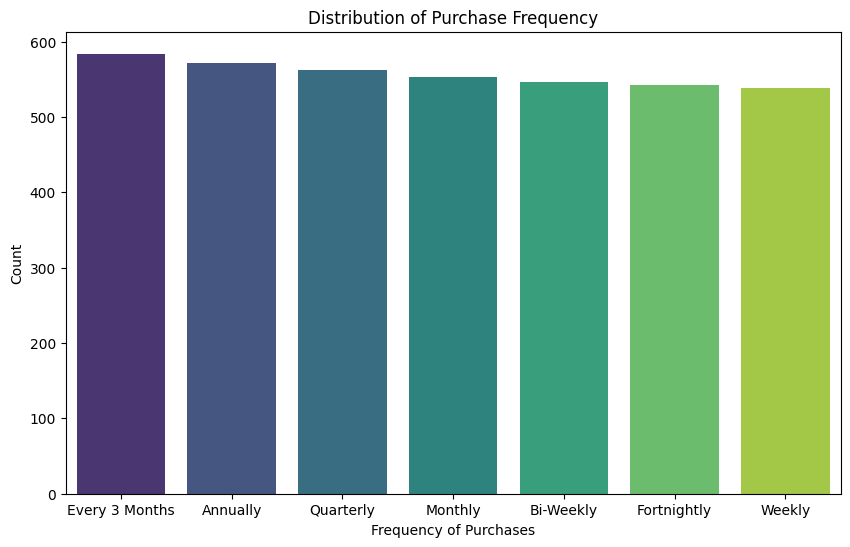

In [17]:
# Distribution of Purchase Frequency:

freq_counts = data['Frequency of Purchases'].value_counts()
print(freq_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=freq_counts.index, y=freq_counts.values, palette='viridis')
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.show()

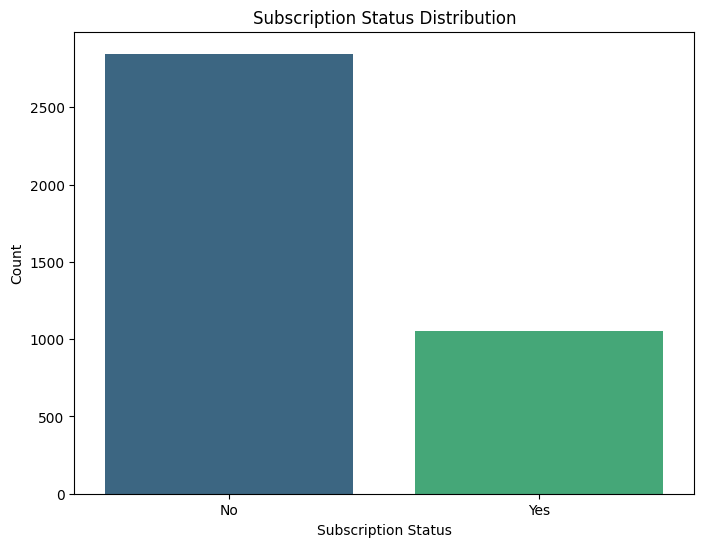

In [18]:
# Subscription Status Distribution:
subscription_counts = data['Subscription Status'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=subscription_counts.index, y=subscription_counts.values, palette='viridis')
plt.title('Subscription Status Distribution')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()

## Review Ratings

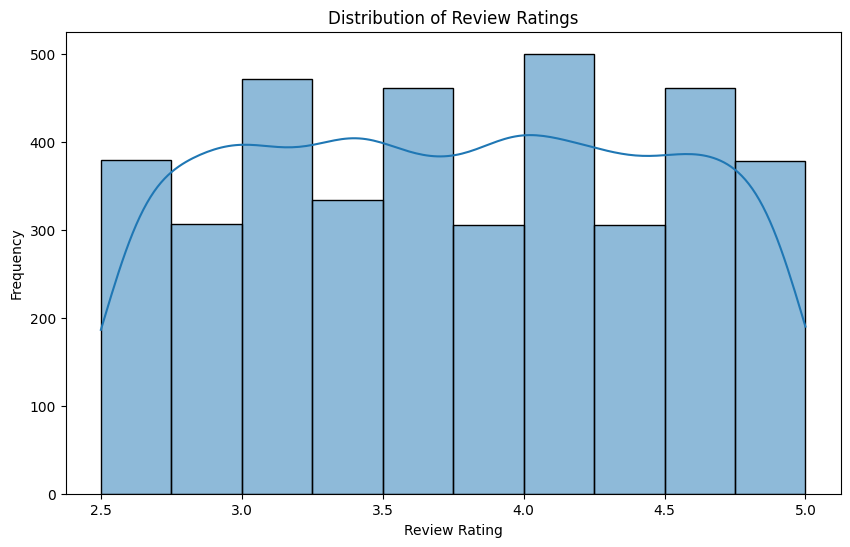

In [19]:
# Distribution of Review Ratings:
plt.figure(figsize=(10, 6))
sns.histplot(data['Review Rating'], bins=10, kde=True)
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.show()

## Discounts and Promo Codes

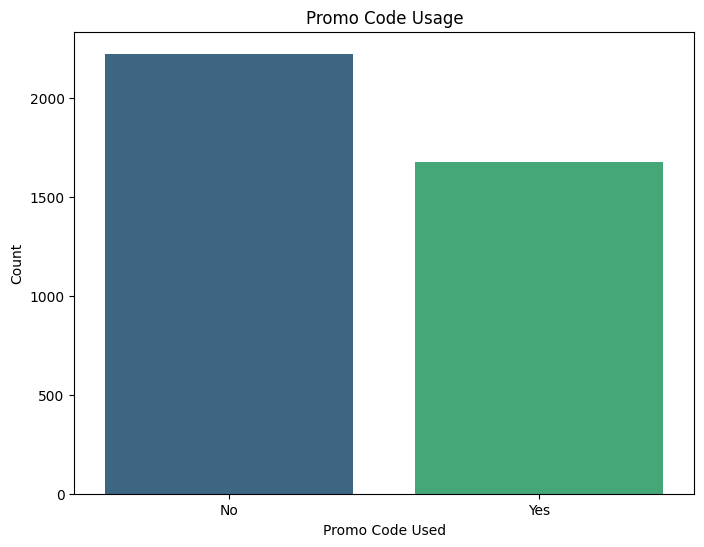

In [20]:
promo_code_counts = data['Promo Code Used'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=promo_code_counts.index, y=promo_code_counts.values, palette='viridis')
plt.title('Promo Code Usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Count')
plt.show()

[59.27906976744186, 60.130454340980656]


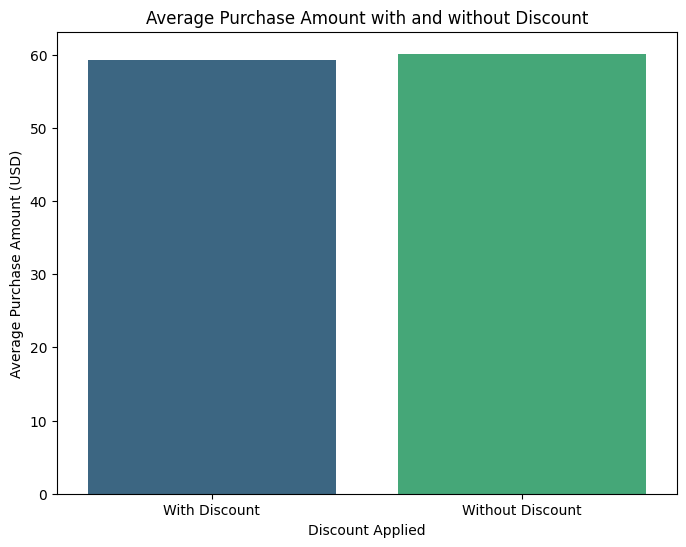

In [21]:
# Average Purchase Amount with and without Discount:
avg_purchase_with_discount = data[data['Discount Applied'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_purchase_without_discount = data[data['Discount Applied'] == 'No']['Purchase Amount (USD)'].mean()
labels = ['With Discount', 'Without Discount']
values = [avg_purchase_with_discount, avg_purchase_without_discount]
print(values)

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=values, palette='viridis')
plt.title('Average Purchase Amount with and without Discount')
plt.xlabel('Discount Applied')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

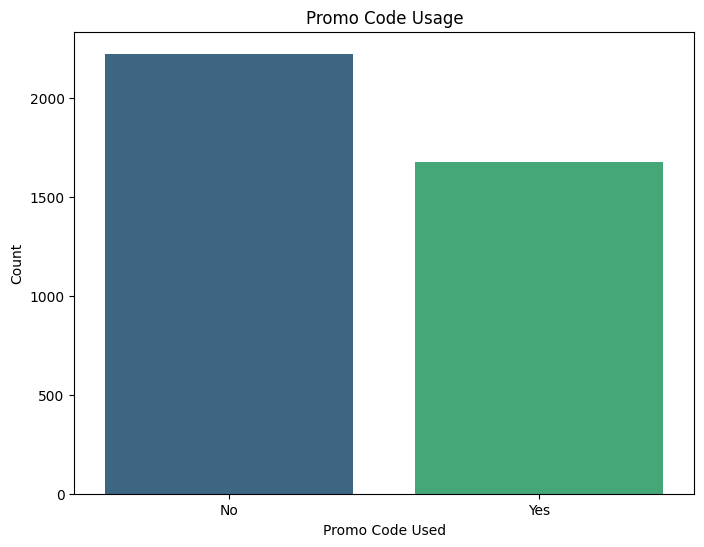

In [22]:
# Promo Code Usage:
promo_code_counts = data['Promo Code Used'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=promo_code_counts.index, y=promo_code_counts.values, palette='viridis')
plt.title('Promo Code Usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Count')
plt.show()

      Category  Review Rating
2     Footwear       3.790651
0  Accessories       3.768629
3    Outerwear       3.746914
1     Clothing       3.723143


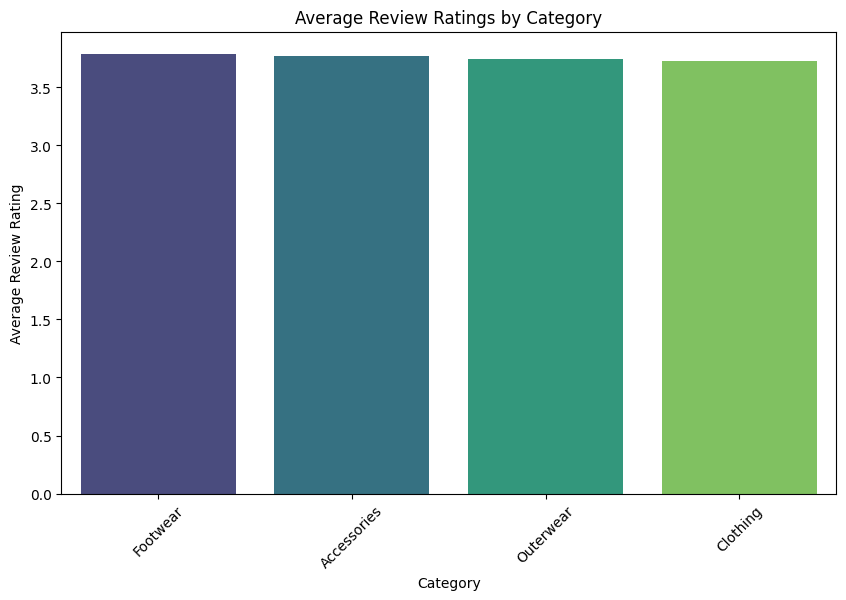

In [23]:
# find out which category has better rating
avg_rating_on_category = data.groupby('Category')['Review Rating'].mean().reset_index().sort_values(by='Review Rating', ascending=False)
print(avg_rating_on_category)

# Create a line plot
plt.figure(figsize=(10, 6))
sns.barplot(x= 'Category',
            y= 'Review Rating',
            data= avg_rating_on_category,
            palette='viridis')
plt.title('Average Review Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=45)
plt.show()

## Customer Lifetime Value

In [24]:
data['Frequency of Purchases']

0       Fortnightly
1       Fortnightly
2            Weekly
3            Weekly
4          Annually
           ...     
3895         Weekly
3896      Bi-Weekly
3897      Quarterly
3898         Weekly
3899      Quarterly
Name: Frequency of Purchases, Length: 3900, dtype: object

**Monthly:** Customers make a purchase every month. There are 12 months in a year, so the value is 12.

**Bi-Weekly:** Customers make a purchase every two weeks. There are 52 weeks in a year, so the value is 52 / 2 = 26.

**Fortnightly:** Customers make a purchase every two weeks, which is the same as bi-weekly. So, the value is also 26.

**Weekly:** Customers make a purchase every week. There are 52 weeks in a year, so the value is 52.

      Customer ID  Purchase Amount (USD)  Frequency of Purchases      CLV
248           249                    100                    52.0  26000.0
1847         1848                    100                    52.0  26000.0
1479         1480                    100                    52.0  26000.0
2214         2215                    100                    52.0  26000.0
2951         2952                     99                    52.0  25740.0
3625         3626                     99                    52.0  25740.0
3553         3554                     99                    52.0  25740.0
3147         3148                     99                    52.0  25740.0
2974         2975                     99                    52.0  25740.0
3476         3477                     99                    52.0  25740.0
992           993                     99                    52.0  25740.0
2530         2531                     98                    52.0  25480.0
1739         1740                     

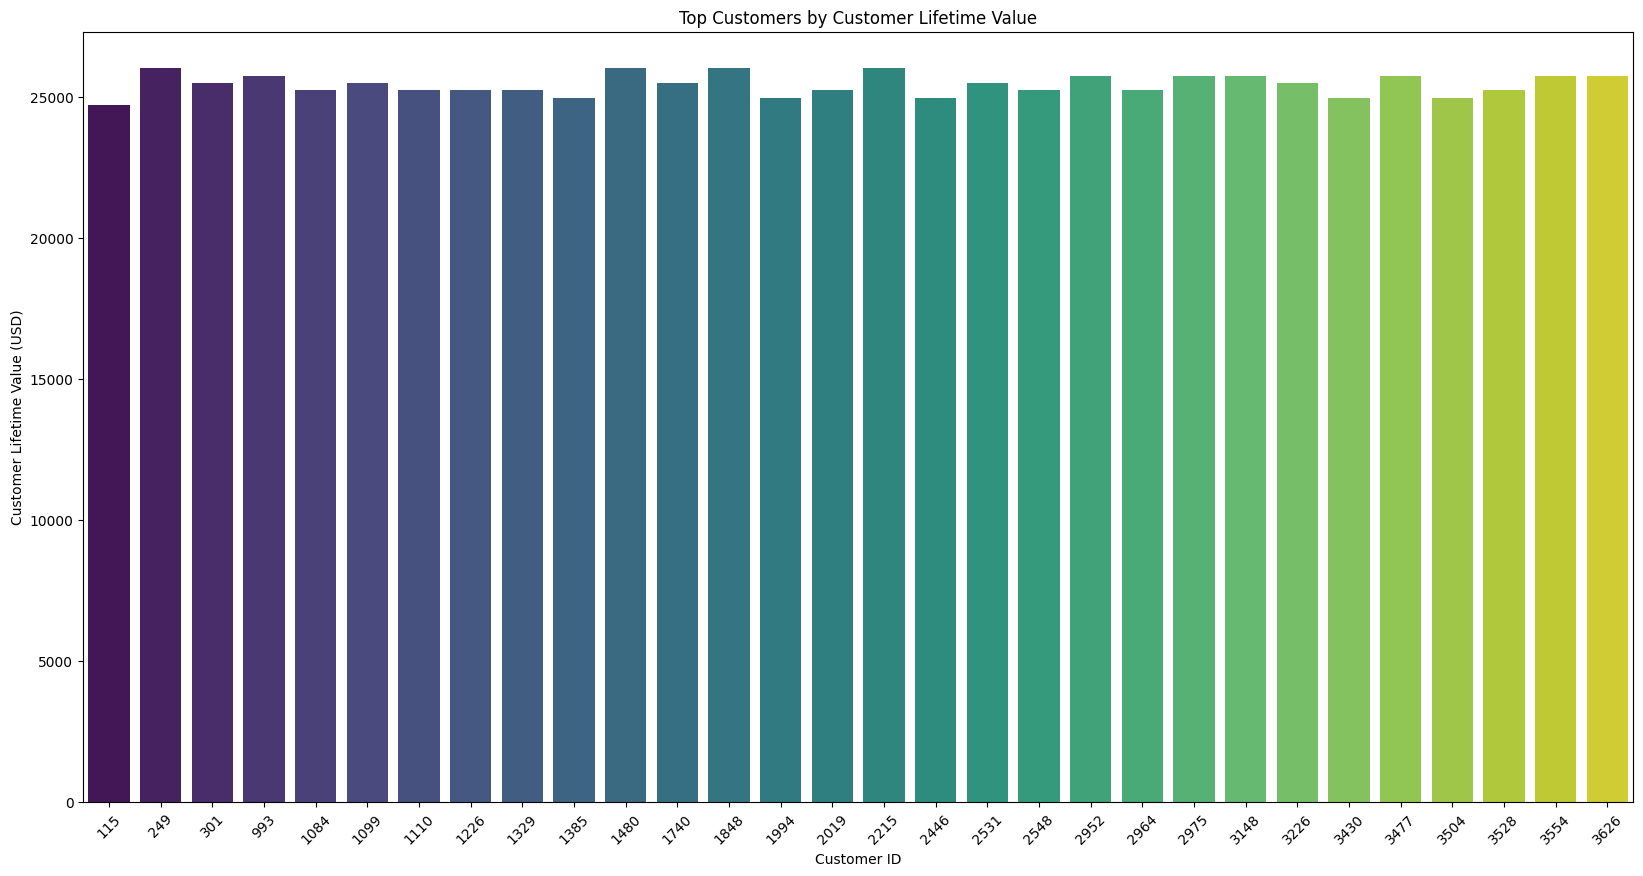

In [25]:
df = pd.read_csv('shopping_trends.csv')

# Map frequency categories to numerical values
frequency_mapping = {
    'Annually': 1,
    'Quarterly': 4,
    'Monthly': 12,
    'Bi-Weekly': 26,
    'Fortnightly': 26,
    'Weekly': 52
}

df['Frequency of Purchases'] = df['Frequency of Purchases'].map(frequency_mapping)
customer_purchase_amount = df.groupby('Customer ID')['Purchase Amount (USD)'].sum().reset_index()
customer_frequency = df.groupby('Customer ID')['Frequency of Purchases'].mean().reset_index()
customer_data = pd.merge(customer_purchase_amount, customer_frequency, on='Customer ID')

# Estimate the average customer lifespan
average_customer_lifespan = 5  # in years

# Calculate CLV for each customer
customer_data['CLV'] = customer_data['Purchase Amount (USD)'] * customer_data['Frequency of Purchases'] * average_customer_lifespan
top_customers = customer_data.sort_values(by='CLV', ascending=False).head(30)

# Display the top 10 customers
print(top_customers)

# Visualize the top 10 customers
plt.figure(figsize=(20, 10))
sns.barplot(x='Customer ID', y='CLV', data=top_customers, palette='viridis')
plt.title('Top Customers by Customer Lifetime Value')
plt.xlabel('Customer ID')
plt.ylabel('Customer Lifetime Value (USD)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data['Cumulative Revenue (USD)'] = data['Purchase Amount (USD)'].cumsum()
data.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cumulative Revenue (USD)
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,53
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,117
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,190


   Season  Cumulative Revenue (USD)
0    Fall                 115678197
1  Spring                 116047081
2  Summer                 109661325
3  Winter                 112089101


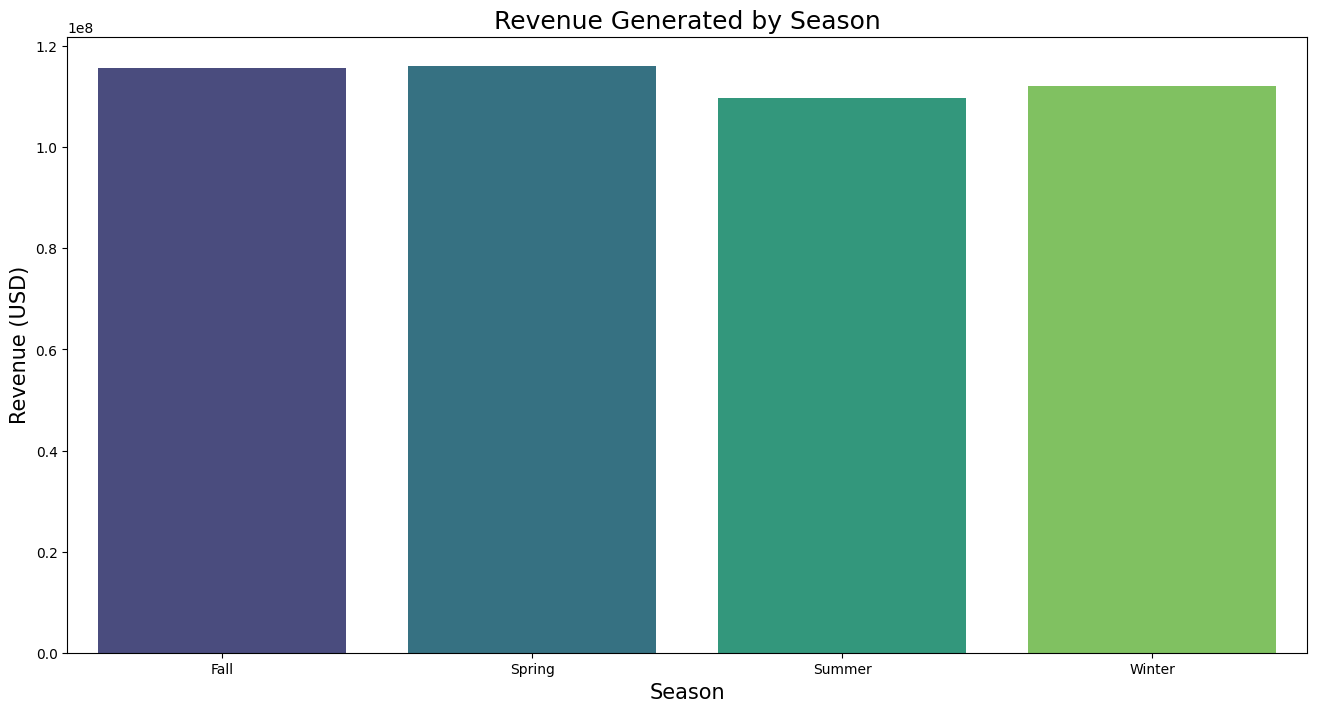

In [27]:
rev_by_season = data.groupby('Season')['Cumulative Revenue (USD)'].sum().reset_index()
print(rev_by_season)

plt.figure(figsize=(16, 8))
sns.barplot(x='Season', y='Cumulative Revenue (USD)', data=rev_by_season, palette= 'viridis')
plt.title('Revenue Generated by Season', fontsize = 18)
plt.xlabel('Season', fontsize = 15)
plt.ylabel('Revenue (USD)', fontsize = 15)
plt.show()

# Predictive Analysis

## Linear Regression Model

In [28]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,26.0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,26.0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,52.0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,52.0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,1.0


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [30]:
data.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cumulative Revenue (USD)
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,53
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,117
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,190


In [39]:
df1 = data[['Gender','Category', 'Season', 'Cumulative Revenue (USD)']]
df1

,Gender,Category,Season,Cumulative Revenue (USD)
0,Male,Clothing,Winter,53
1,Male,Clothing,Winter,117
2,Male,Clothing,Spring,190
3,Male,Footwear,Spring,280
4,Male,Clothing,Spring,329
...,...,...,...,...
3895,Female,Clothing,Summer,232841
3896,Female,Accessories,Spring,232890
3897,Female,Accessories,Spring,232923
3898,Female,Footwear,Summer,233000


In [32]:
X = df1.drop(columns=['Cumulative Revenue (USD)'])

y = df1['Cumulative Revenue (USD)']

label_cols = X.select_dtypes('object')
lb_encoders = {}
for col in label_cols:
    lb_encoders[col] = LabelEncoder()
    X[col] = lb_encoders[col].fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2 * 100}')

Mean Absolute Error: 34010.81272112142
Mean Squared Error: 1672781360.0345027
R^2 Score: 63.65512219692283
